# Data: Past, Present, Future
## Lab 6: statistical testing and p-value hacking


In this lab, you will work with some data sets concerning physical attributes of brains and measures of intelligence. Collectively you will undertake a series of statistical examinations AND you will also reflect critically on the data sets in question, the literature about them, and the licitness of different computational operations on data sets.

## Fisher's experimental program

Why significance testing? What solution to the problem of empirical knowledge is it, particularly in the Fisherian form? What solutions to the creation of knowledge does that program reject?

Let's look at a few pages from Fisher's [*Design of Experiments*](http://www.phil.vt.edu/dmayo/PhilStatistics/b%20Fisher%20design%20of%20experiments.pdf)

What is the problem of "inverse probabilility" discussed on pp. 4-5?

Bayes: $P(H\mid E) = \frac{P(E\mid H) \cdot P(H)}{P(E)}$

What does Fisher so reject Bayes as a solution on 6-7?


What's the central problem with $P(H)$ for many observers?

Why is experimental work essential to the liberation of the human intellect at p. 9?

Why do tests of signficance around a null hypothesis offer a solution to the problem of knowledge at 15?

Finally what justification for "p<.05" on p. 13? How does *Fisher* state p<.05?

## Explaining Statistics Humor

![significance](https://imgs.xkcd.com/comics/significant.png)

What's the joke here? 


## P-value hacking

> Goodhart's Law: “when a measure become a target, it is no longer a measure“

Let's say you're looking to publish a nice result with the right sort of p-value. For p-values hacking, see, e.g., http://www.nature.com/news/scientific-method-statistical-errors-1.14700 

>The irony is that when UK statistician Ronald Fisher introduced the P value in the 1920s, he did not mean it to be a definitive test. He intended it simply as an informal way to judge whether evidence was significant in the old-fashioned sense: worthy of a second look. The idea was to run an experiment, then see if the results were consistent with what random chance might produce. [...]

>For all the P value's apparent precision, Fisher intended it to be just one part of a fluid, non-numerical process that blended data and background knowledge to lead to scientific conclusions. But it soon got swept into a movement to make evidence-based decision-making as rigorous and objective as possible. This movement was spearheaded in the late 1920s by Fisher's bitter rivals, Polish mathematician Jerzy Neyman and UK statistician Egon Pearson, [...] They pointedly left out the P value.

>But while the rivals feuded — Neyman called some of Fisher's work mathematically “worse than useless”; Fisher called Neyman's approach “childish” and “horrifying [for] intellectual freedom in the west” — other researchers lost patience and began to write statistics manuals for working scientists. And because many of the authors were non-statisticians without a thorough understanding of either approach, they created a hybrid system that crammed Fisher's easy-to-calculate P value into Neyman and Pearson's reassuringly rigorous rule-based system. This is when a P value of 0.05 became enshrined as 'statistically significant', for example. “The P value was never meant to be used the way it's used today,” says Goodman.

## Time to Try

Go to the tool called "Hack Your Way to Scientific Glory" at

https://fivethirtyeight.com/features/science-isnt-broken/#part1


What did you manage to show was significant p<.05?

### p-value hacking fun 

For super extra fun with p-value hacking, get a key paper on the subject, "False-Positive Psychology: Undisclosed Flexibility in Data Collection and Analysis Allows Presenting Anything as Significant"

http://journals.sagepub.com/doi/figure/10.1177/0956797611417632?

and then the data

https://zenodo.org/record/7664


Check out their second result: 

>According to their birth dates, people were nearly a year-and-a-half younger after listening to “When I’m Sixty-Four” (adjusted M = 20.1 years) rather than to “Kalimba” (adjusted M = 21.5 years), F(1, 17) = 4.92, p = .040.



What is the difference between their description of the experiment and the way they present the process in their Table 3? 


For a very controversial example, see 

> Bem, Daryl J. “Feeling the Future: Experimental Evidence for Anomalous Retroactive Influences on Cognition and Affect.” Journal of Personality and Social Psychology 100, no. 3 (2011): 407–25. https://doi.org/10.1037/a0021524.

Check out experiment one. You can find the data [here]( https://replicationindex.wordpress.com/2018/01/20/my-email-correspondence-with-daryl-j-bem-about-the-data-for-his-2011-article-feeling-the-future/)




## Now to doing some of this in Python. 

In [21]:

# usual preliminaries
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)

Let's start with some data. This data set is used in boatloads of intro stats courses and online tutorials, particularly of the extremely mechanical sort. Let's be mechanical then dive in.

In [22]:
data = pd.read_csv('http://www.scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")

In [23]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


Using standard pandas and other statistical functions, start describing this data set.

FYI 
The test includes evaluation of several forms of IQ: 

Full-Scale IQ (FSIQ) score, which is based on Verbal IQ (VIQ) and a Performance IQ (PIQ). (Use the interwebs to find out what these are.)

Examples might include .mean(), .describe(), boxplots and so forth. What and where are the outliers?

For example, you can draw a box plot like so:

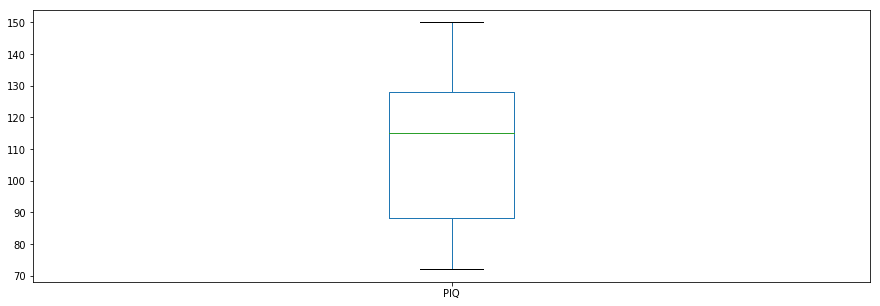

In [24]:
data["PIQ"].plot.box()

Now try doing some comparisons of male and female brains and IQs, because nothing is more hard wired into social science than doing so. 

Let's not forget some exploratory data analysis using exciting graphical functions. Make a scatter matrix for starters.
Because I'm nice, I'll get you going.

In [25]:
from pandas.tools.plotting import scatter_matrix

Now, you can't possibly be looking at that scatter matrix without itching to do some regressions, right? 

Of course, right.


Ok, go crazy with some regressions and get back to me. Maybe do some more EDA to look for interesting correlations among subsets of the data. High IQ, low IQ, men, women, tall, short, etc. 

## t-tests

t-tests, t-tests I hear you cry. We got your t-tests. 

They are found in the `stats` package within `scipy`.


Let's look at the documentation and do some.


First figure out the difference between st.ttest_1samp() and stats.ttest_ind(). 

Use the ? to get documentation.

In [26]:
import scipy.stats as st

In [27]:
st.ttest_1samp?

In [28]:
st.ttest_ind?

Let's try a t-test. Just run this cell:

In [29]:
st.ttest_1samp(data['VIQ'], 100)

Ttest_1sampResult(statistic=3.3074146385401786, pvalue=0.0020301174047818219)

What does this `mean`? What has been done? How should it be interpreted? How would our friend Fisher understand this: what would the null hypothesis be?

Now, let's try a slighter harder one. 

In [30]:
st.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

What's the question being asked here? 

## let's back up and look at the paper



Reflect  on the data set we are using. What important questions must be kept in mind while using this data set?

Willerman, Lee, Robert Schultz, J. Neal Rutledge, and Erin D. Bigler. “In Vivo Brain Size and Intelligence.” Intelligence 15, no. 2 (1991): 223–228. https://doi.org/10.1016/0160-2896(91)90031-8



Who has cited and used this paper? Find at least one example, and discuss their reflections upon it.

Let's go back to your Gould readings. What might he counsel in thinking about this paper and this data set?

# Recent meta-analysis

go to http://www.sciencedirect.com/science/article/pii/S014976341500250X

What's the story they offer about "Publication bias" (in section 3.1.4.3.)?

Can you find the data with any of the more recent studies cited in that metaanalysis to attempt to replicate a result? 

# What is to be done? 

The authors suggest
>We propose the following six requirements for authors.

>    Authors must decide the rule for terminating data collection before data collection begins and report this rule in the article. Following this requirement may mean reporting the outcome of power calculations or disclosing arbitrary rules, such as “we decided to collect 100 observations” or “we decided to collect as many observations as we could before the end of the semester.” The rule itself is secondary, but it must be determined ex ante and be reported.

>    Authors must collect at least 20 observations per cell or else provide a compelling cost-of-data-collection justification. This requirement offers extra protection for the first requirement. Samples smaller than 20 per cell are simply not powerful enough to detect most effects, and so there is usually no good reason to decide in advance to collect such a small number of observations. Smaller samples, it follows, are much more likely to reflect interim data analysis and a flexible termination rule. In addition, as Figure 1 shows, larger minimum sample sizes can lessen the impact of violating Requirement 1.

>    Authors must list all variables collected in a study. This requirement prevents researchers from reporting only a convenient subset of the many measures that were collected, allowing readers and reviewers to easily identify possible researcher degrees of freedom. Because authors are required to just list those variables rather than describe them in detail, this requirement increases the length of an article by only a few words per otherwise shrouded variable. We encourage authors to begin the list with “only,” to assure readers that the list is exhaustive (e.g., “participants reported only their age and gender”).

>    Authors must report all experimental conditions, including failed manipulations. This requirement prevents authors from selectively choosing only to report the condition comparisons that yield results that are consistent with their hypothesis. As with the previous requirement, we encourage authors to include the word “only” (e.g., “participants were randomly assigned to one of only three conditions”).

>    If observations are eliminated, authors must also report what the statistical results are if those observations are included. This requirement makes transparent the extent to which a finding is reliant on the exclusion of observations, puts appropriate pressure on authors to justify the elimination of data, and encourages reviewers to explicitly consider whether such exclusions are warranted. Correctly interpreting a finding may require some data exclusions; this requirement is merely designed to draw attention to those results that hinge on ex post decisions about which data to exclude.

>    If an analysis includes a covariate, authors must report the statistical results of the analysis without the covariate. Reporting covariate-free results makes transparent the extent to which a finding is reliant on the presence of a covariate, puts appropriate pressure on authors to justify the use of the covariate, and encourages reviewers to consider whether including it is warranted. Some findings may be persuasive even if covariates are required for their detection, but one should place greater scrutiny on results that do hinge on covariates despite random assignment.

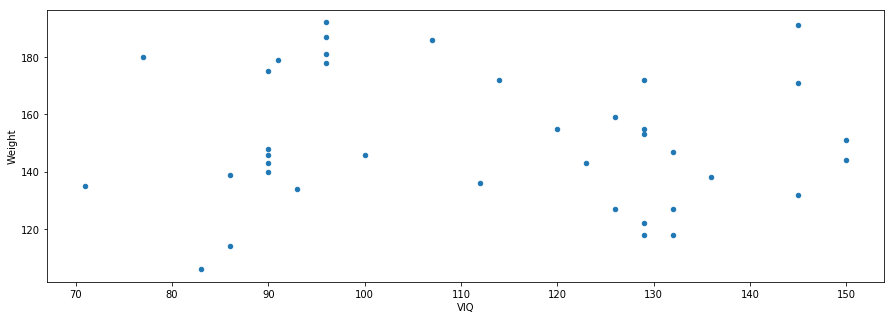

In [31]:
data.plot.scatter(x="VIQ", y="Weight")

In [32]:
scatter_matrix(st)

/Users/wiggins/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


AttributeError: module 'scipy.stats' has no attribute '_get_numeric_data'

In [33]:
data.plot.scatter?

In [37]:
import pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ed25240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f7ba5f8>]], dtype=object)

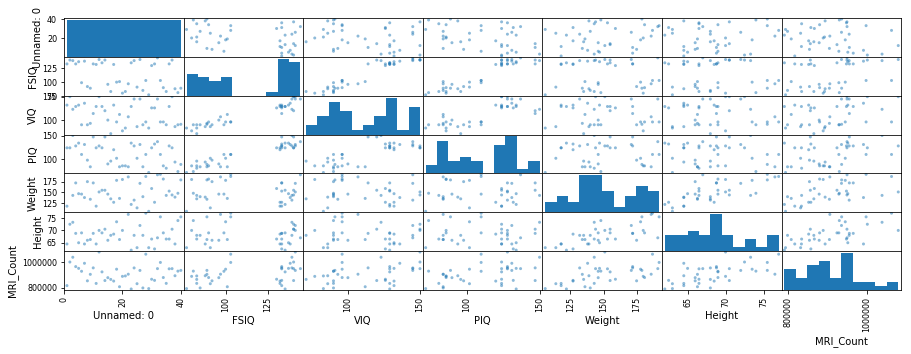

In [40]:
pandas.plotting.scatter_matrix(data)

In [39]:
st

<module 'scipy.stats' from '/Users/wiggins/anaconda3/lib/python3.6/site-packages/scipy/stats/__init__.py'>